## Room Occupancy Detection

**Name:** Thoukeela T M

**Organization:** Entri Elevate

**Date:** 08-01-2025

## Overview of Problem Statement

The Room Occupancy Estimation dataset aims to predict whether a room is occupied or not based on environmental conditions such as temperature, humidity, and light. This classification problem has applications in energy optimization, smart building systems, and security monitoring.

## Objective

Develop a model to classify room occupancy based on the provided features. This involves:

* **Data Understanding:**  Analyze the dataset to identify patterns and insights.
* **Data Preprocessing:** Clean and transform the data for model readiness.
* **Model Building:** Train and evaluate machine learning algorithms.
* **Evaluation:** Assess model performance using metrics like accuracy, precision, recall, and F1-score.

## Data Description

**Source:**
The dataset is downloaded from the UCI Machine Learning Repository. 

**Data Size:**
10129 rows and 19 columns.

**Features:**
The dataset contains features collected through sensors, including:
* **Temperature (°C):** If the temperature rises above baseline levels, it may indicate occupancy.
* **Humidity (%):** Elevated humidity levels can signify that people are in the room.
* **Light :** A spike in light intensity indicates that the room may be in use.
* **CO2 Levels :** Higher CO2 concentrations suggest the presence of people.
* **Sound :** increased sound intensity correlates with human activity.
* **Motion Detectors(PIR) :** Movement in the room provides direct evidence of occupancy.
* **Occupancy:** Binary target variable (0 = unoccupied, 1 = occupied).


## Data Collection

#### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import joblib

In [9]:
# Load the dataset

data = pd.read_csv("Occupancy_Estimation.csv")

In [10]:
#Converting to Dataframe
df= pd.DataFrame(data)
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [11]:
#Displaying information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [12]:
#Describing the details of the dataset
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [13]:
#Checking shape of data
df.shape

(10129, 19)

## Data Preprocessing 

##### Dropping date and Time columns

In [16]:
df = df.drop(columns = ['Date', 'Time'], axis=1)

In [17]:
#Displaying columns
df.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

##### Checking for null values

In [19]:
df.isnull().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

##### Checking for Duplicates

In [21]:
df.duplicated().sum()

1301

In [22]:
df = df.drop_duplicates()

df.duplicated().sum()

0

###### Duplicate values removed from the Dataset

In [23]:
#Getting data types of each columns
df.dtypes

S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [186]:
#Finding Numerical columns
numeric_columns = df.select_dtypes(include=['number']) #finf numeric columns
numerical_columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

##### Checking for outliers

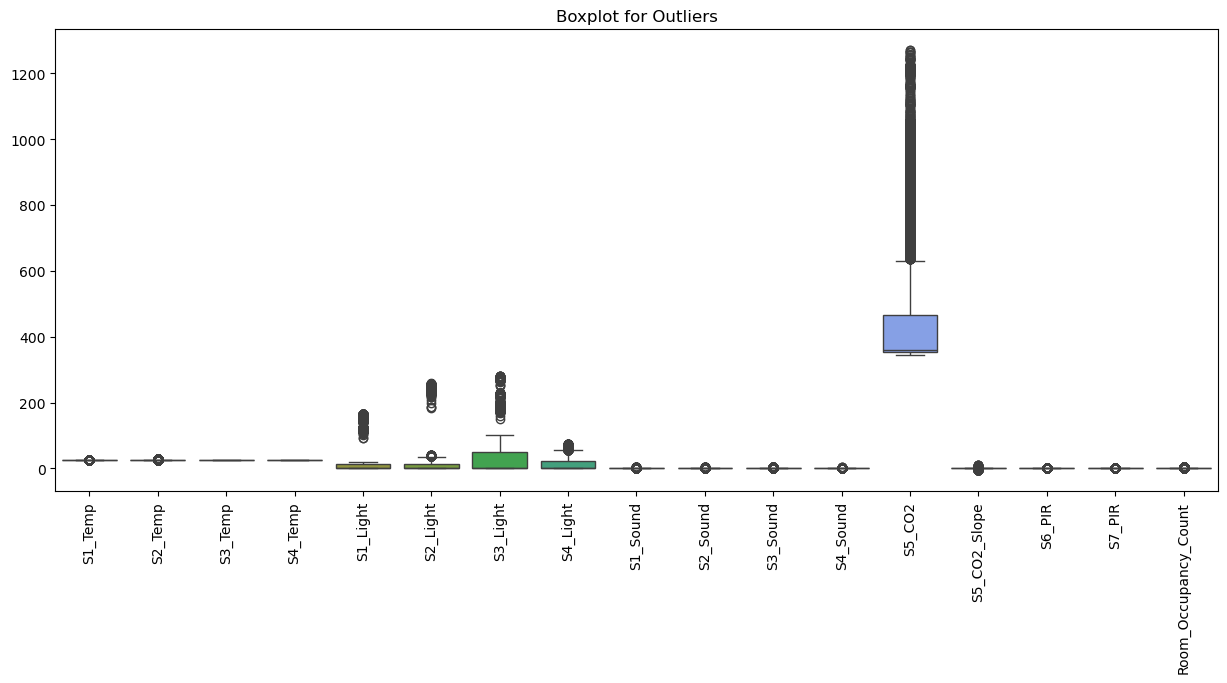

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot for Outliers")
plt.show()

In [27]:
df['Room_Occupancy_Count'].unique()

array([1, 2, 3, 0], dtype=int64)

In [28]:
print(df['Room_Occupancy_Count'].value_counts())

Room_Occupancy_Count
0    6927
2     748
3     694
1     459
Name: count, dtype: int64


In [29]:
numerical_columns= df.select_dtypes(include = ['number']).columns
numerical_columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [30]:
# These are the features having continues numerical values. (ordinal value having categotical behaviour doesnt have true outliers)
outlier_fix_columns = [
    'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'
]

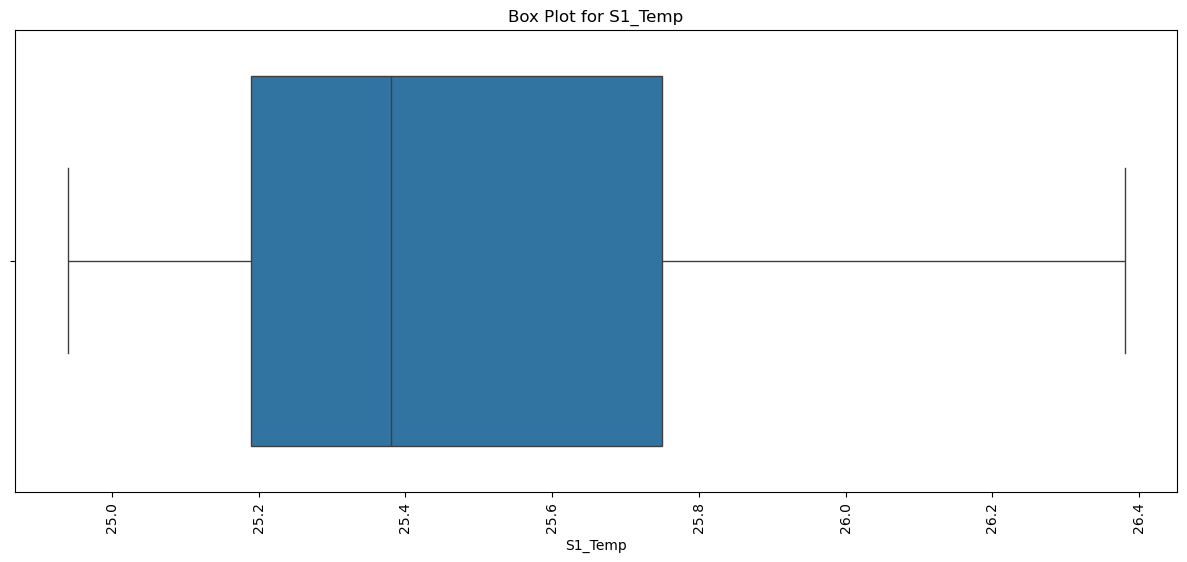

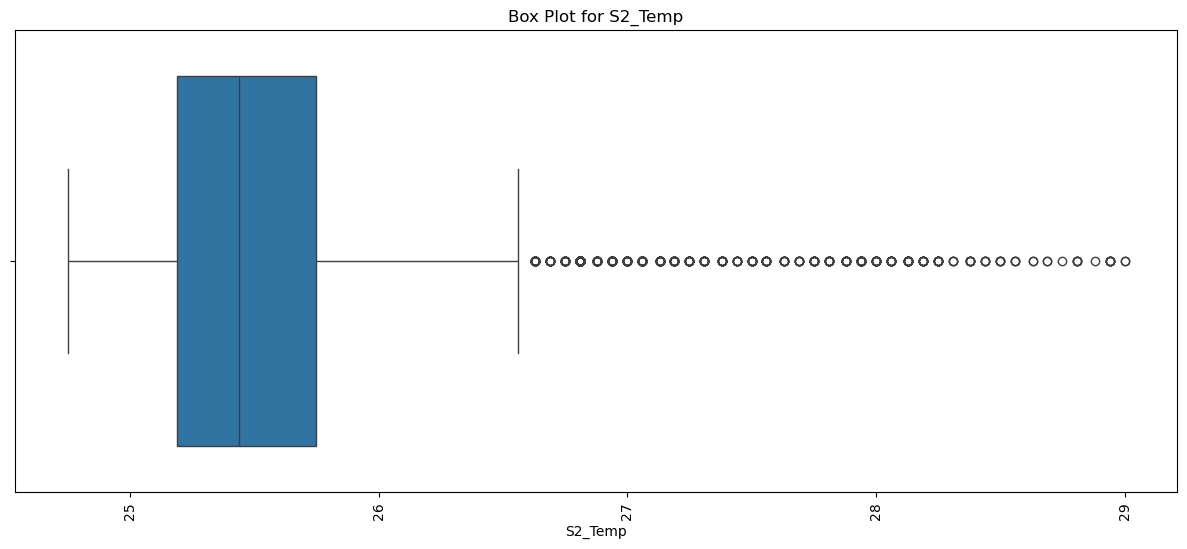

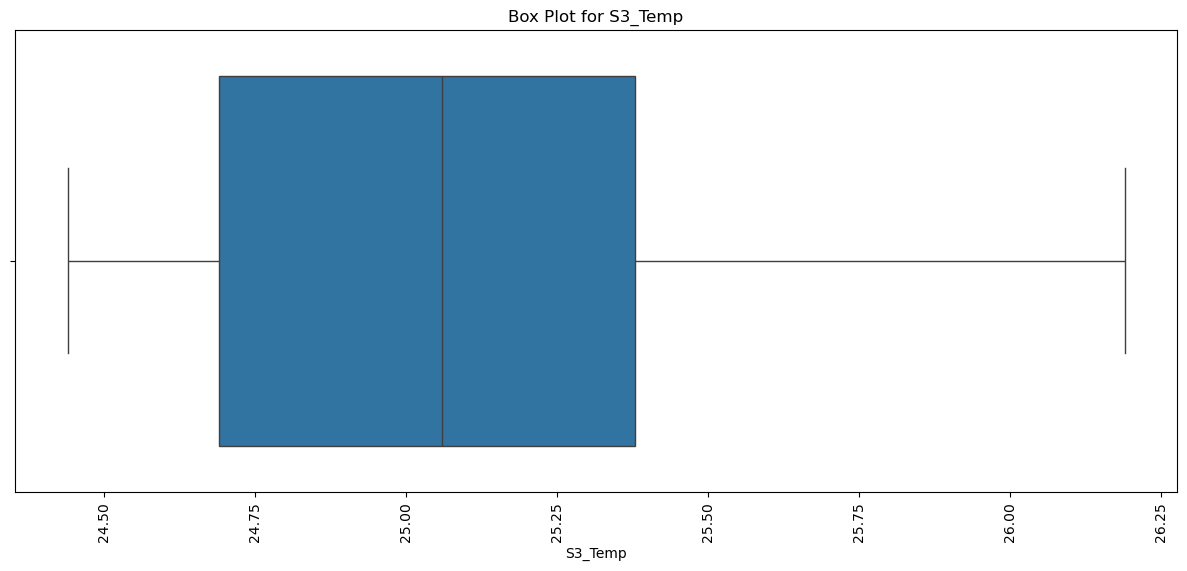

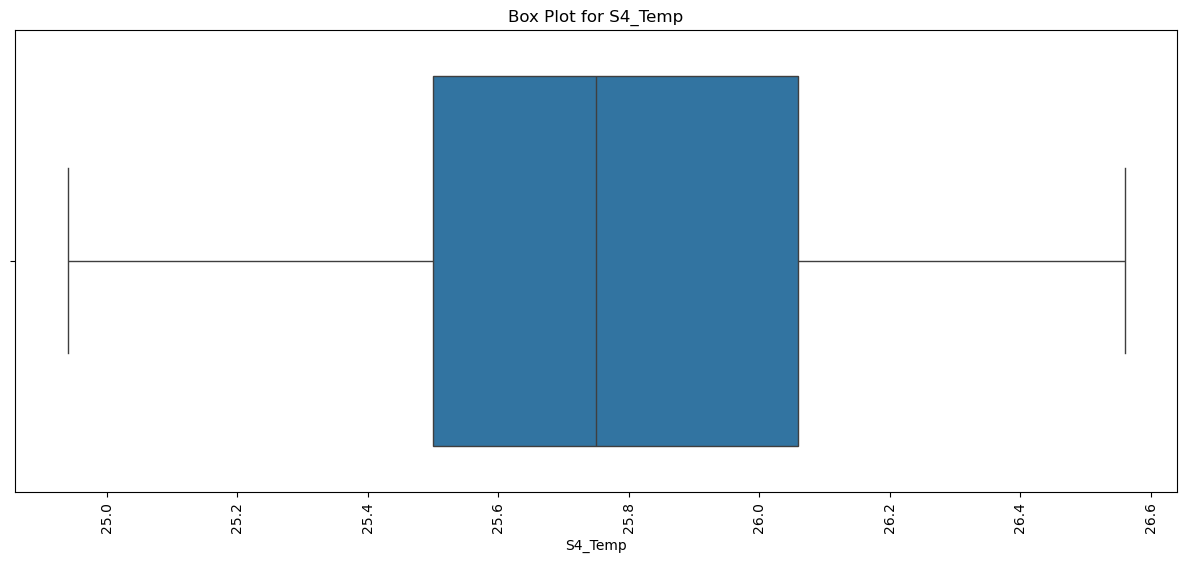

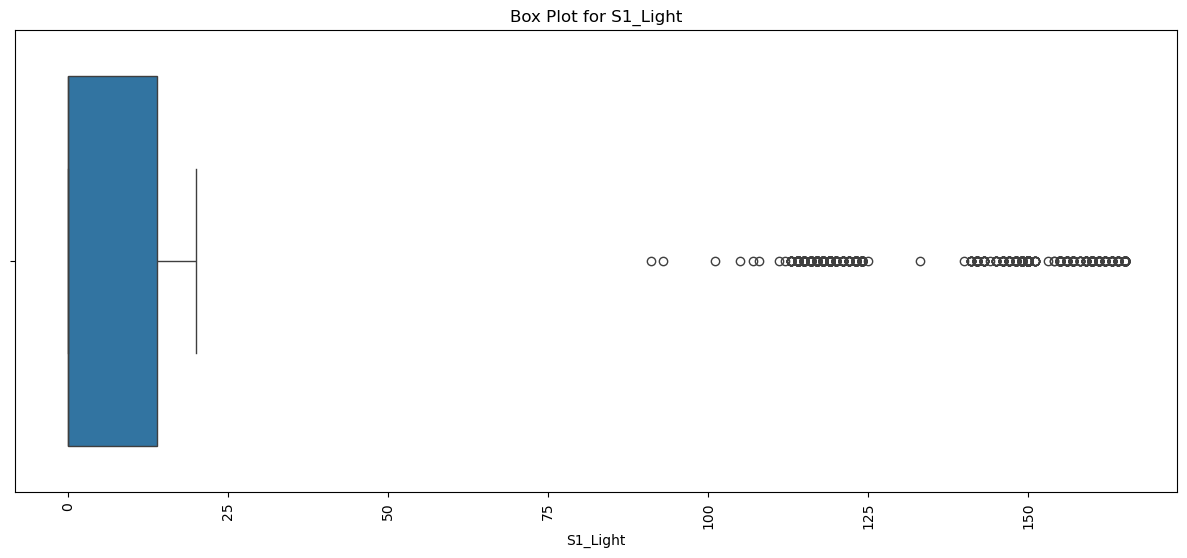

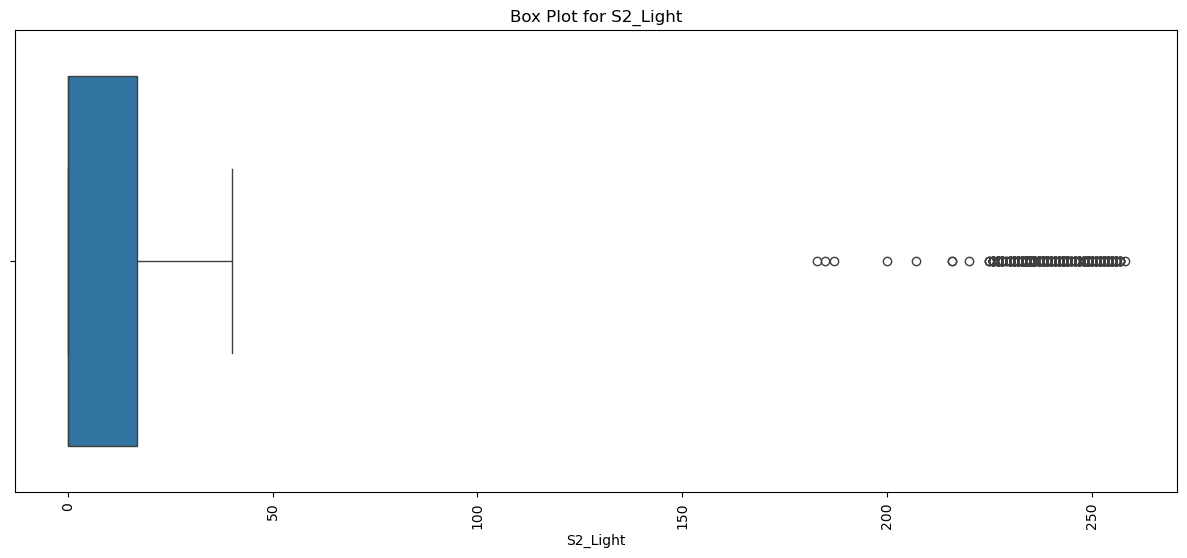

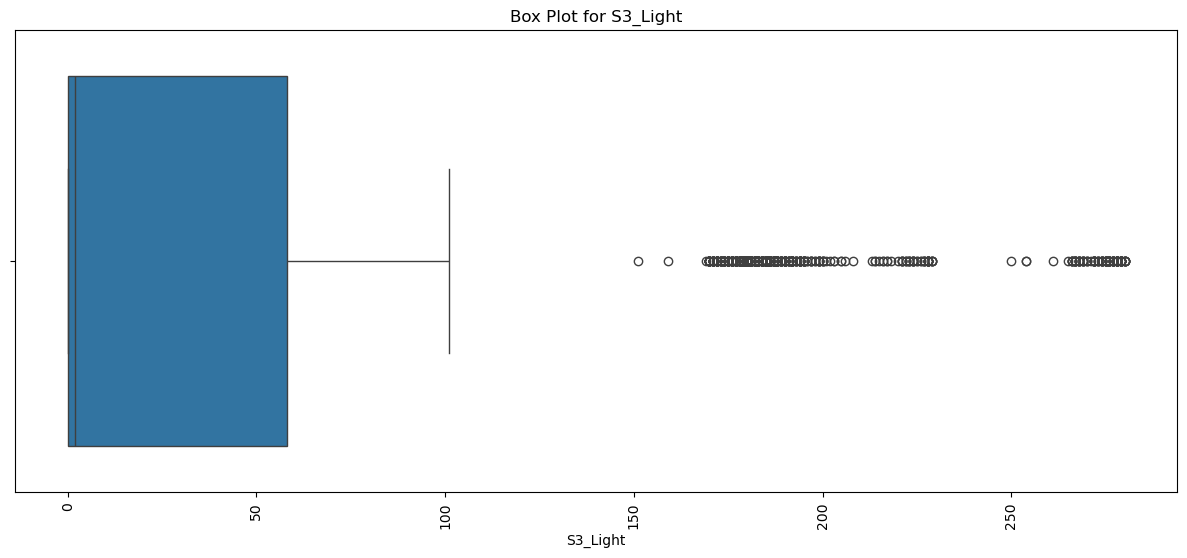

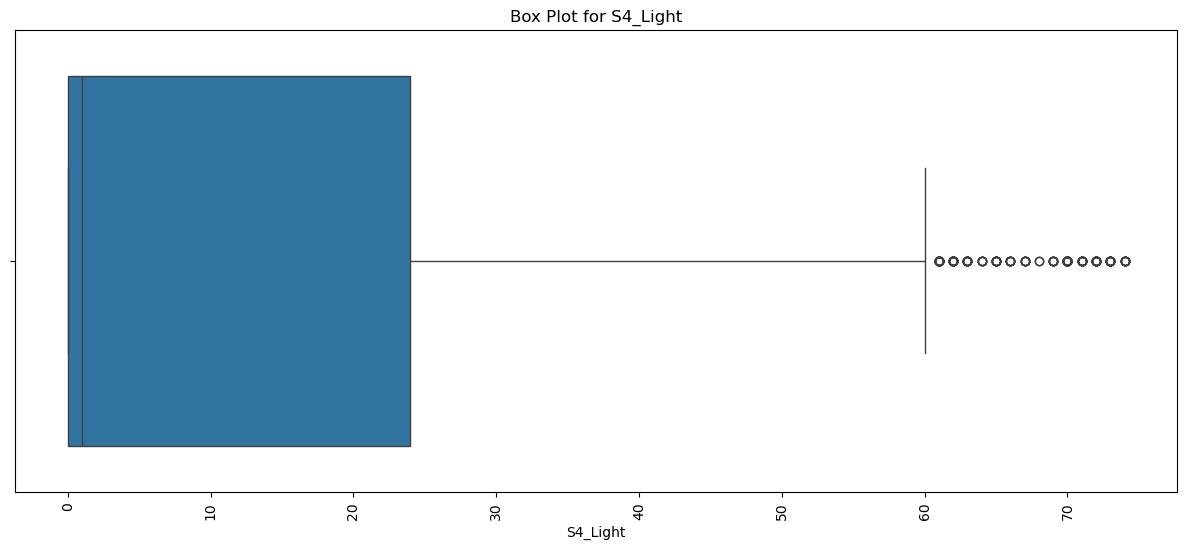

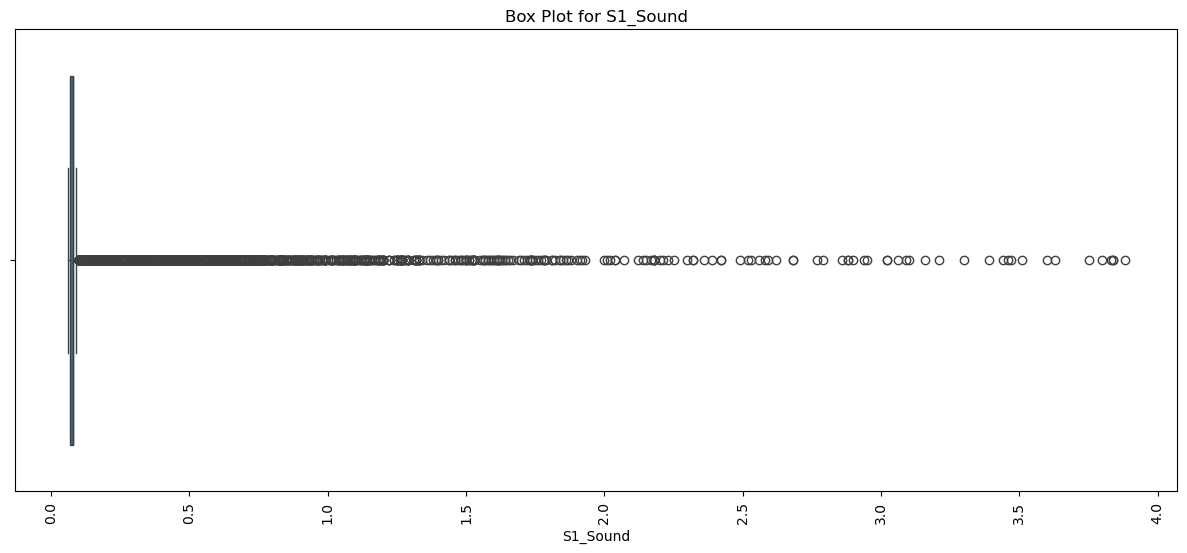

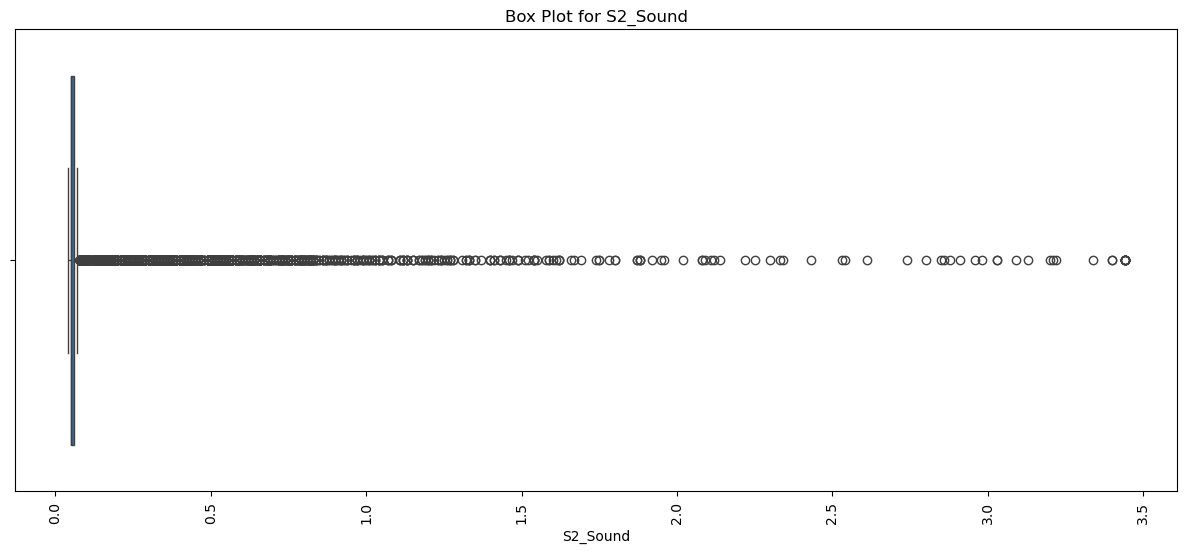

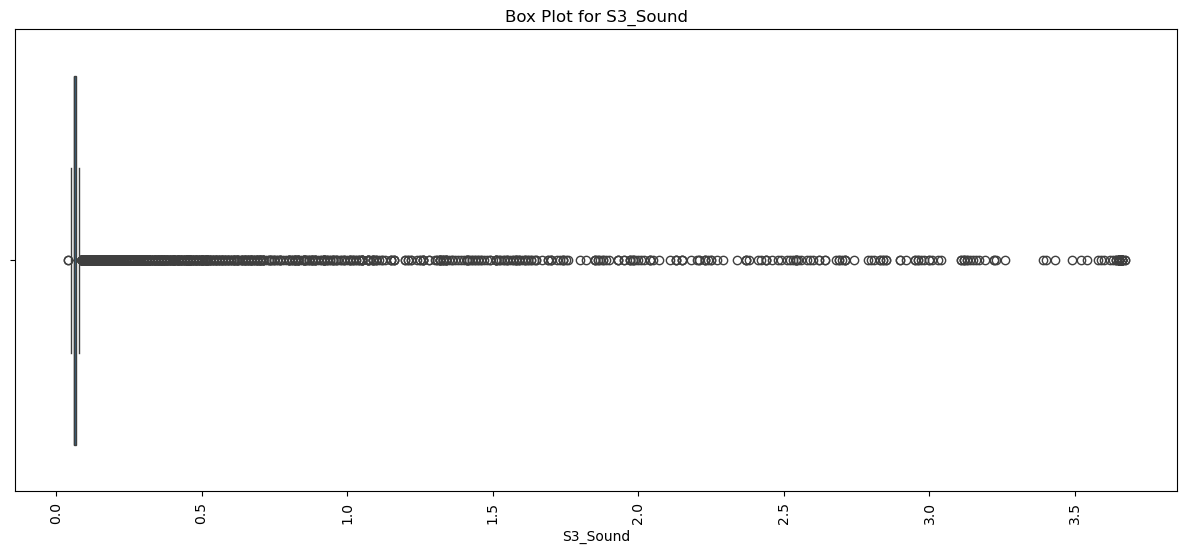

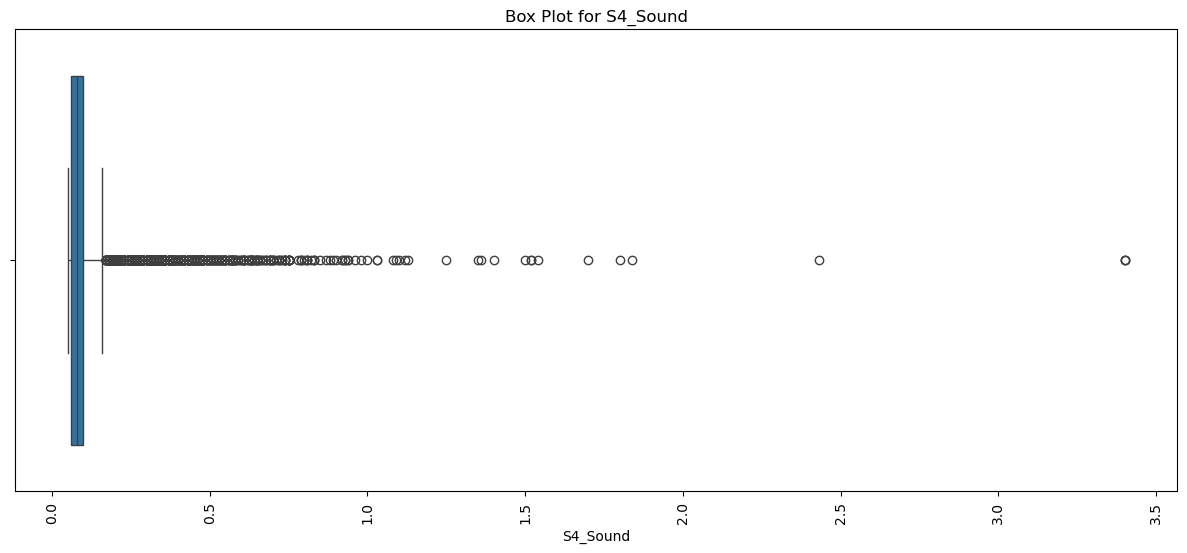

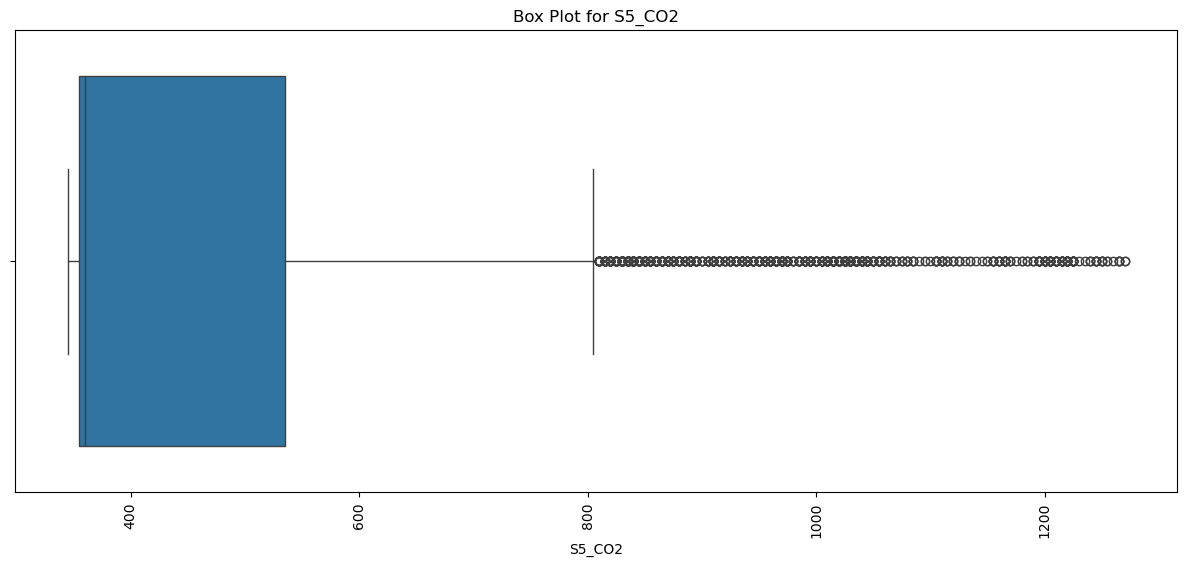

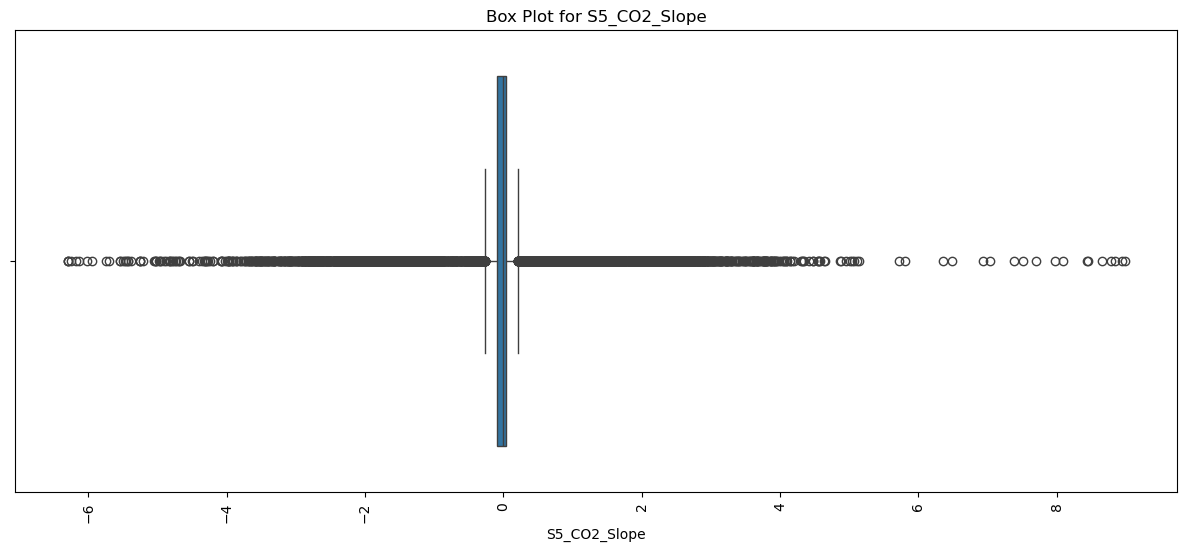

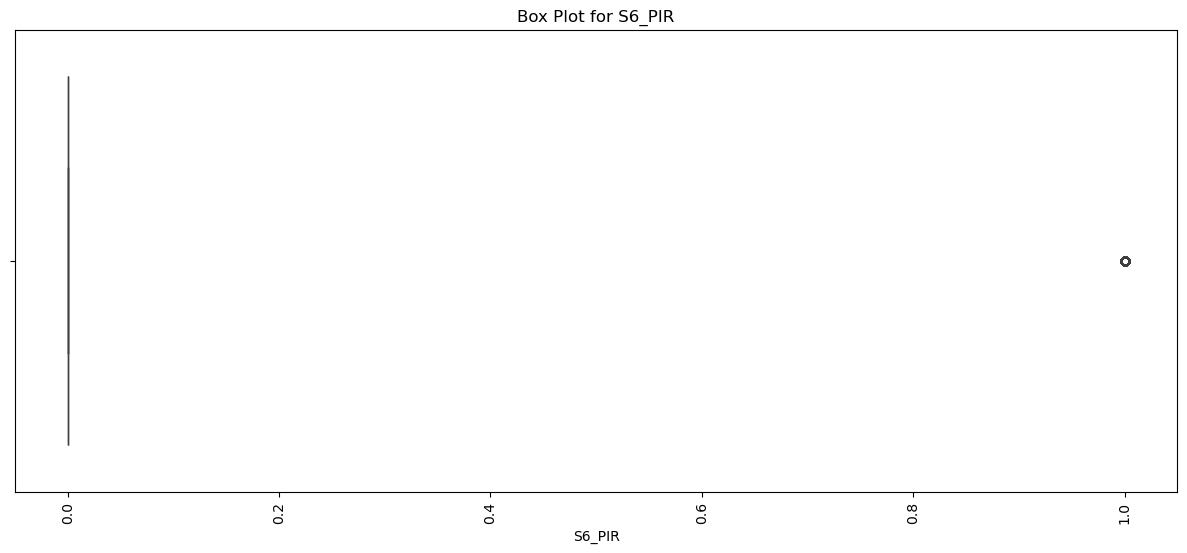

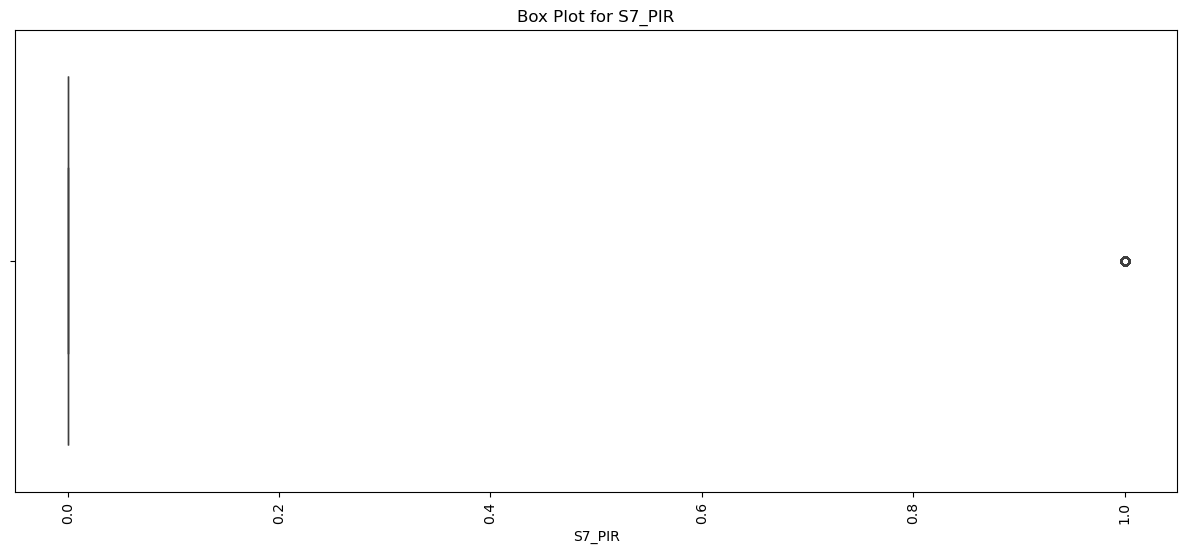

In [31]:
# Visualising outliers using boxplot 
for column in outlier_fix_columns:
 plt.figure(figsize=(15, 6))
 sns.boxplot(data=df, x=column)
 plt.xticks(rotation=90)
 plt.title(f"Box Plot for {column}")
 plt.show()

Shape of the DataFrame after handling outliers: (8828, 17)


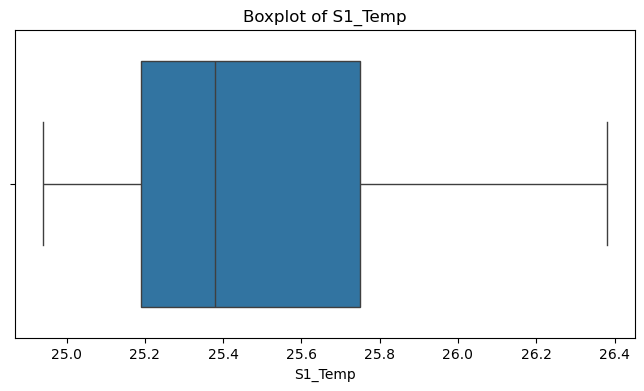

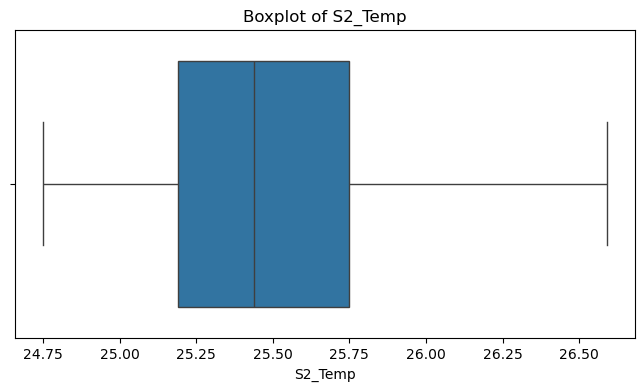

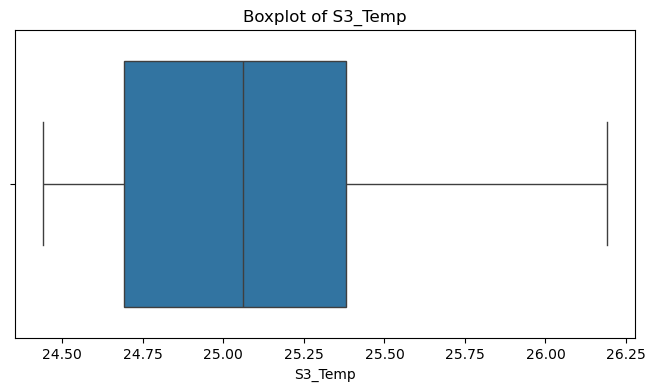

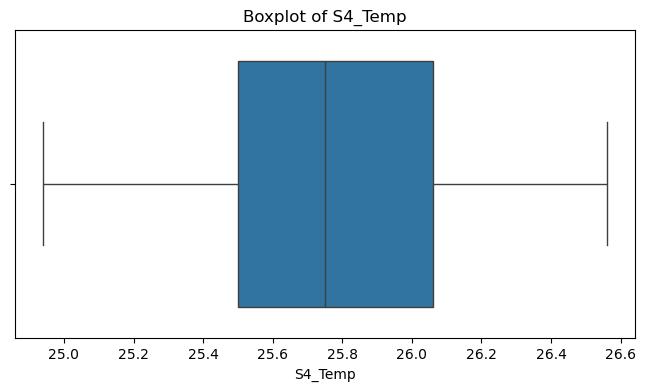

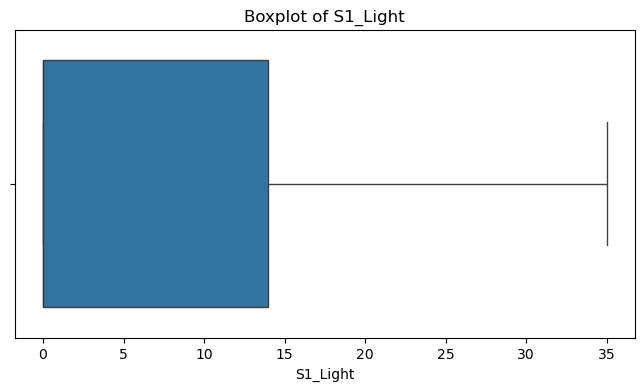

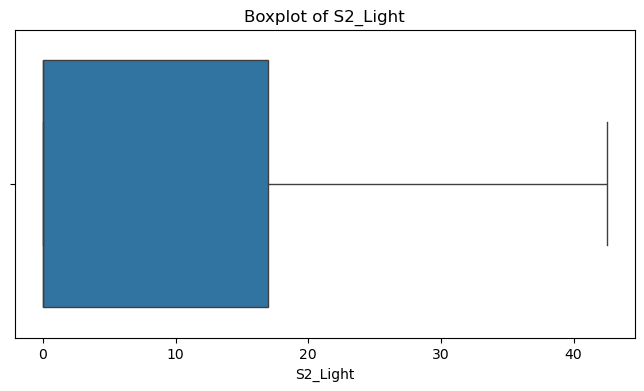

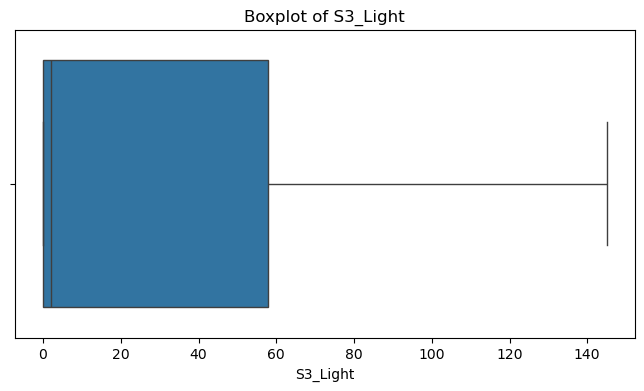

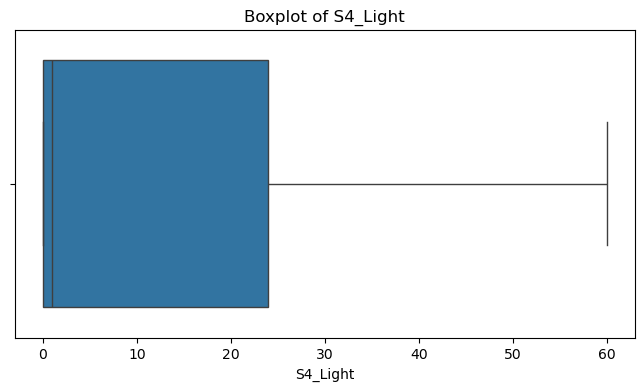

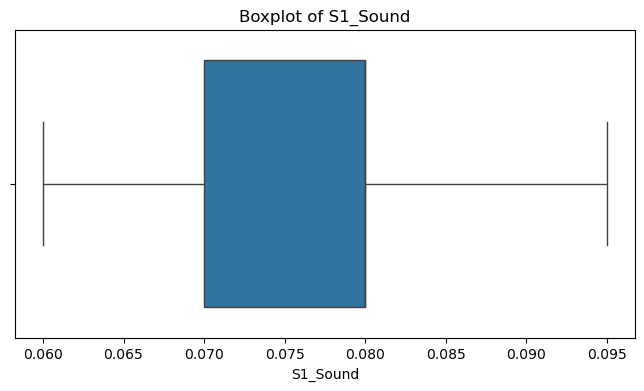

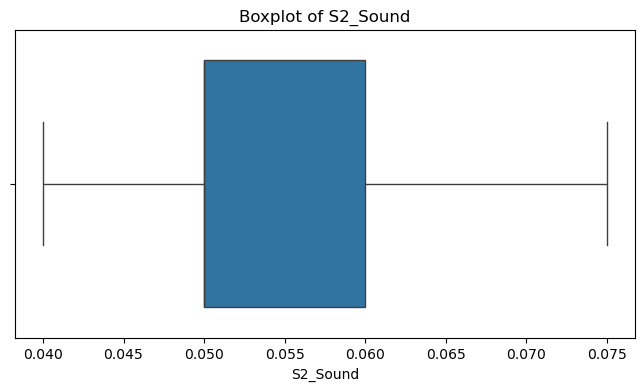

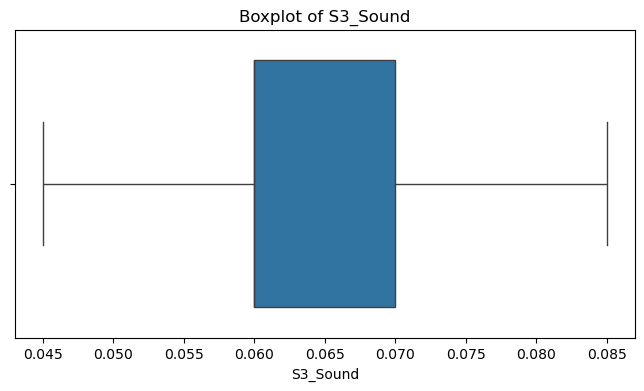

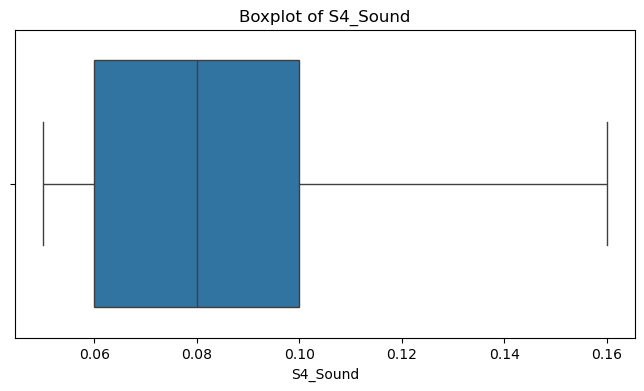

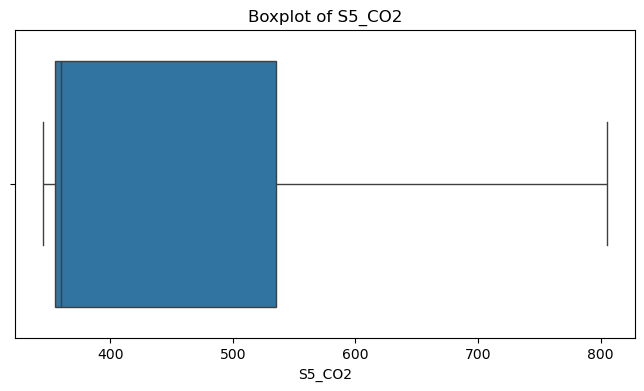

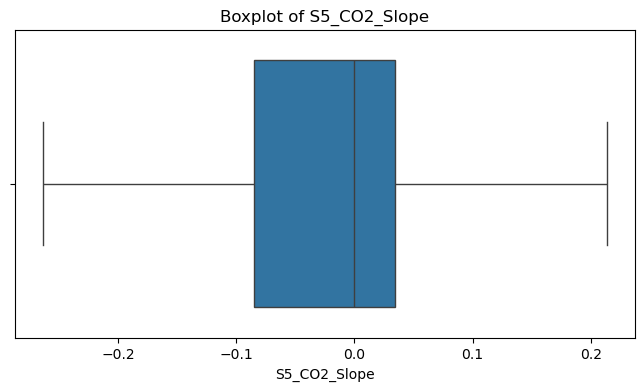

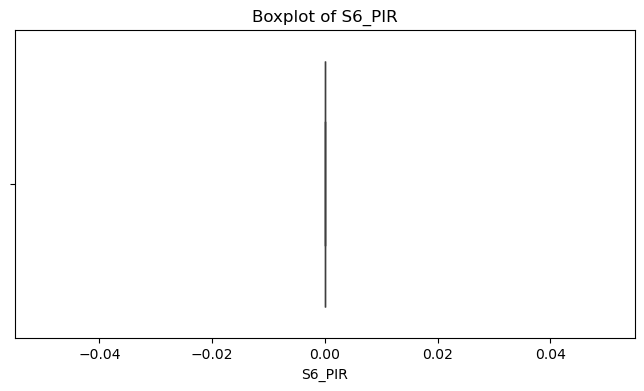

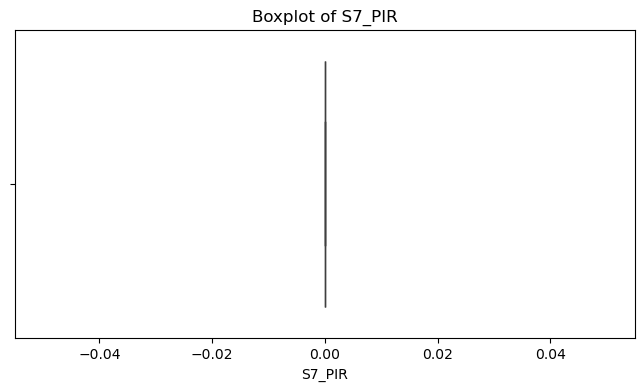

In [32]:
#remove outliers using iqr method
target_variable = 'Room_Occupancy_Count'

def handle_outliers_iqr(df, target_variable):
    # Iterate over numeric columns except the target variable
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cols_to_process = [col for col in numeric_cols if col != target_variable]
    
    for col in cols_to_process:
        # Calculate the IQR, lower and upper bounds
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR  # Lower limit
        upper = Q3 + 1.5 * IQR  # Upper limit

        # Apply capping (Winsorizing) to cap values beyond bounds
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    return df


# Apply the function to handle outliers in the dataset
df1 = handle_outliers_iqr(df, target_variable)

# Verify the result
print(f"Shape of the DataFrame after handling outliers: {df1.shape}")

# Draw boxplots for the numeric columns (excluding the target variable)
cols_to_plot = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_variable]
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [33]:
print(df['Room_Occupancy_Count'].value_counts())

Room_Occupancy_Count
0    6927
2     748
3     694
1     459
Name: count, dtype: int64


In [34]:
# Check skewness of numerical columns
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(df1[numerical_features].skew())

S1_Temp                 0.775159
S2_Temp                 1.098041
S3_Temp                 0.474509
S4_Temp                 0.031438
S1_Light                1.165679
S2_Light                1.337089
S3_Light                1.342729
S4_Light                1.100554
S1_Sound                0.300336
S2_Sound                0.780236
S3_Sound                0.695687
S4_Sound                1.152694
S5_CO2                  1.281334
S5_CO2_Slope           -0.163839
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count    1.832676
dtype: float64


In [35]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# List of columns to transform
columns_to_transform = [
    'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
    'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'
]

# Apply the transformation to each column
for col in columns_to_transform:
    df1[col] = pt.fit_transform(df1[[col]])

print("Transformation complete!")


Transformation complete!


<Axes: ylabel='Density'>

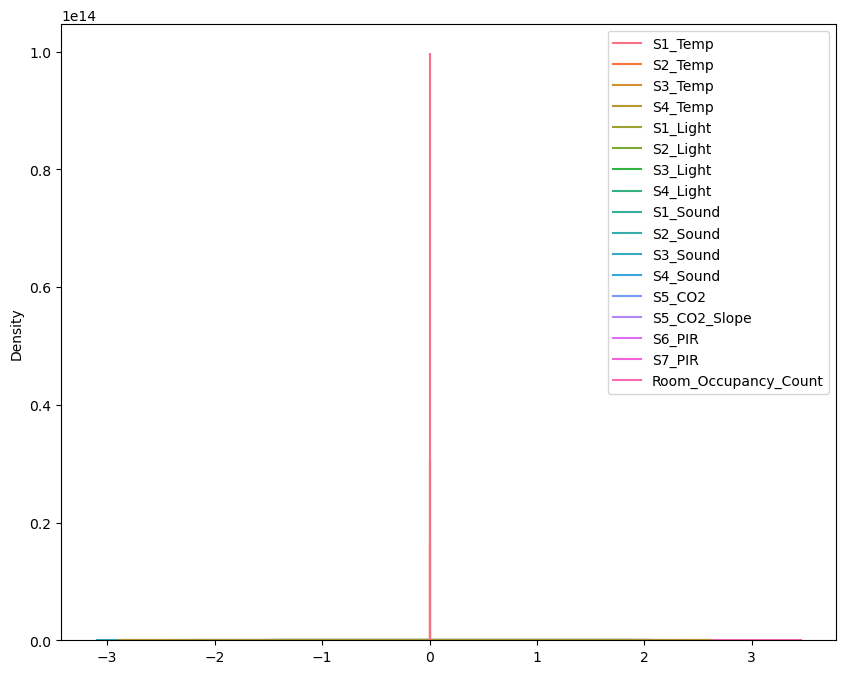

In [36]:
# Drawing KDE plot
plt.figure(figsize=(10,8))
sns.kdeplot(df1)

In [37]:
#Checking skewness of the data
df1.skew()

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.001915
S1_Light                0.293352
S2_Light                0.285516
S3_Light                0.155912
S4_Light                0.175191
S1_Sound                0.039628
S2_Sound                0.116226
S3_Sound                0.104841
S4_Sound                0.171627
S5_CO2                  0.737950
S5_CO2_Slope           -0.012033
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count    1.832676
dtype: float64

## Exploratory Data Analysis

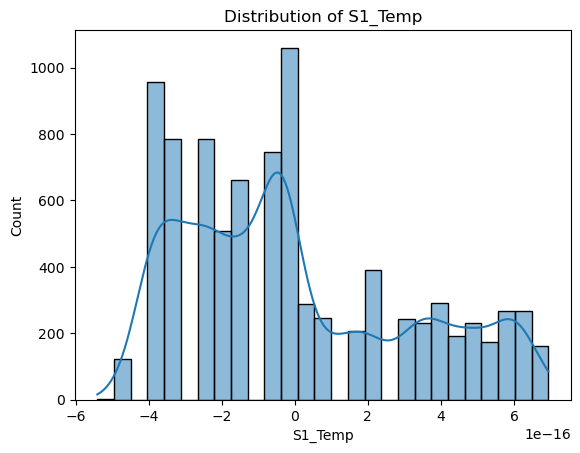

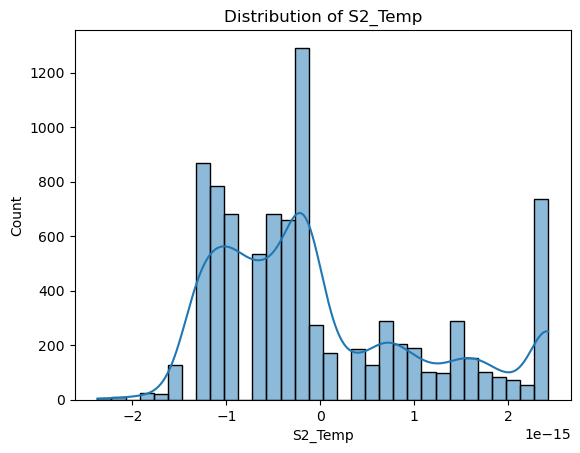

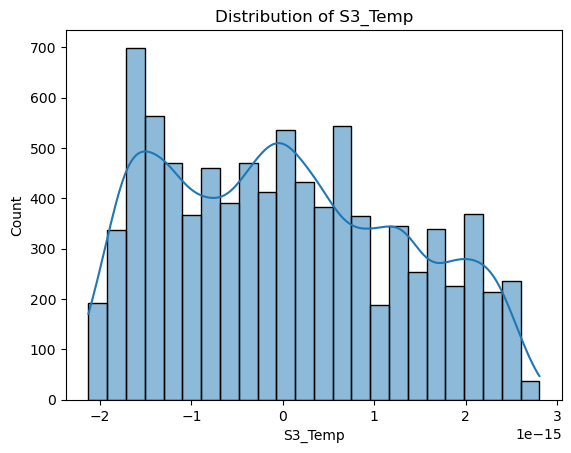

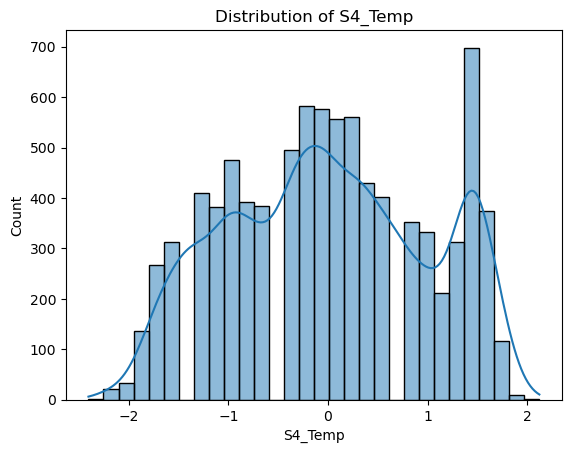

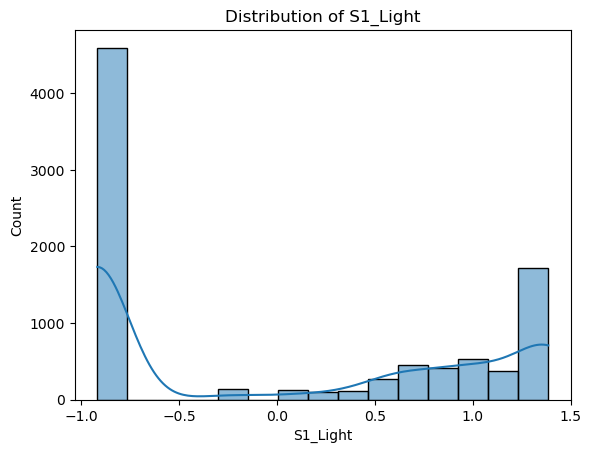

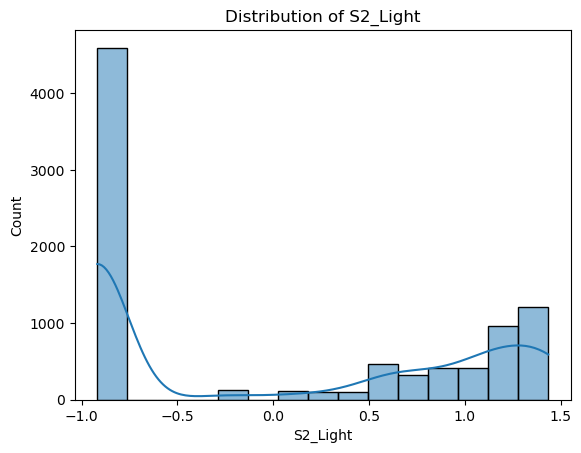

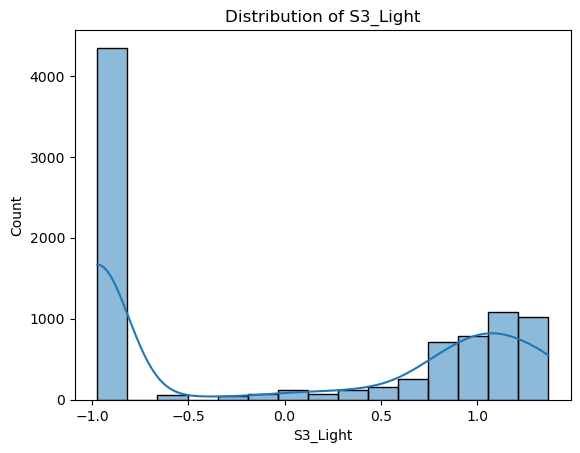

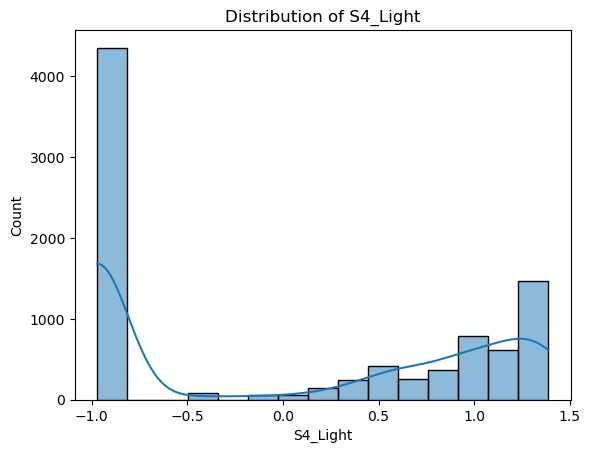

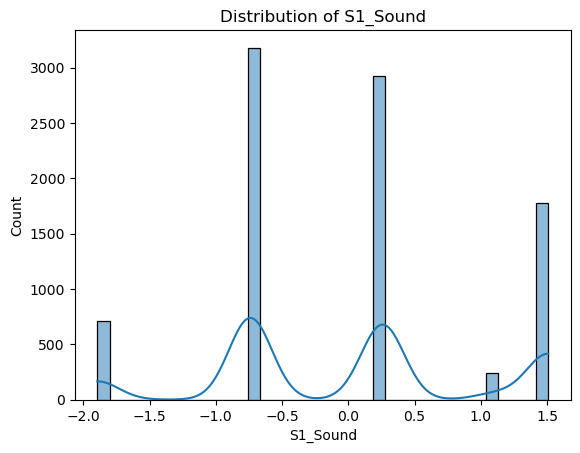

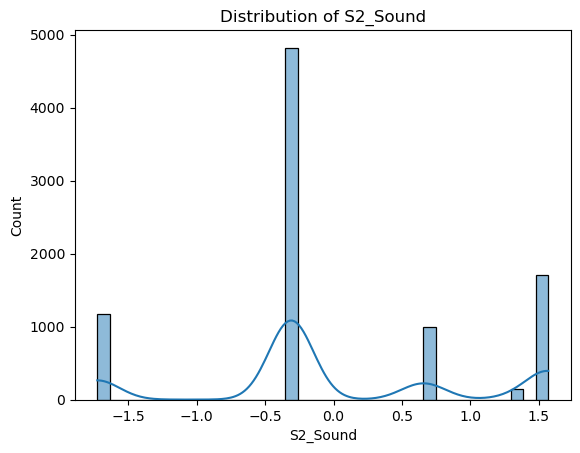

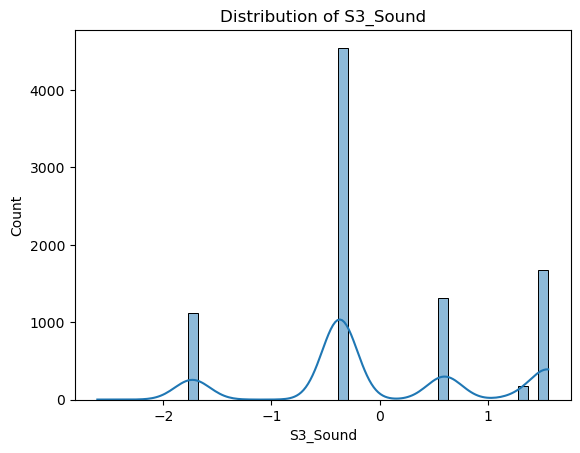

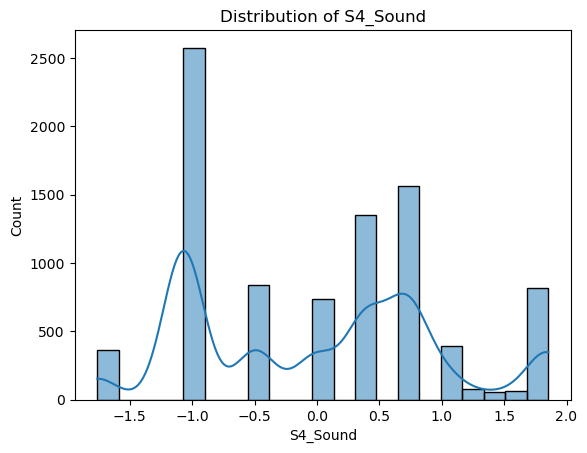

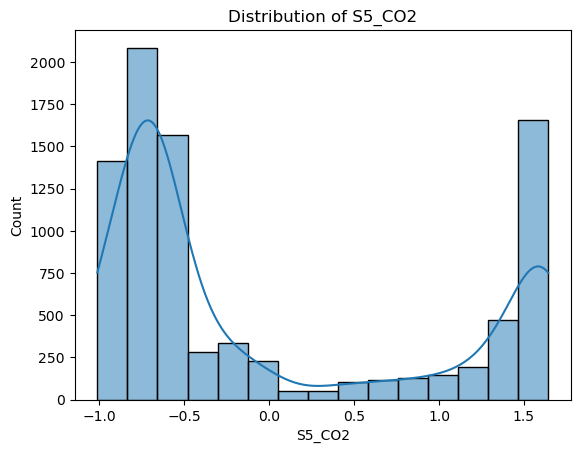

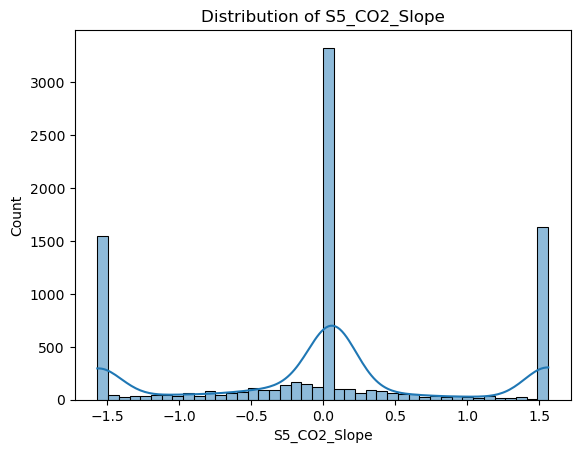

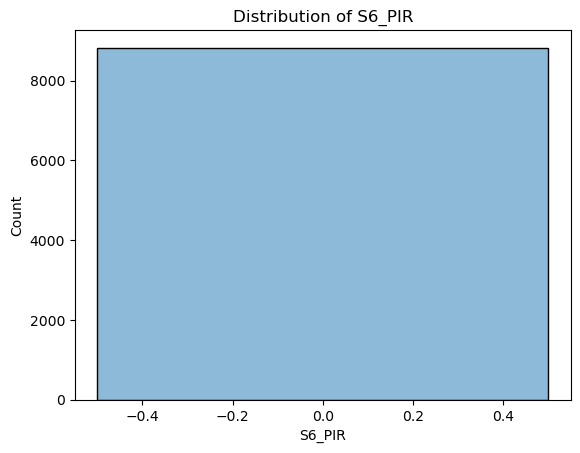

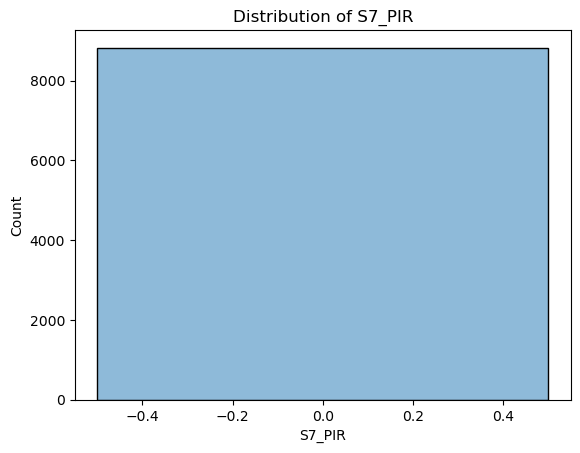

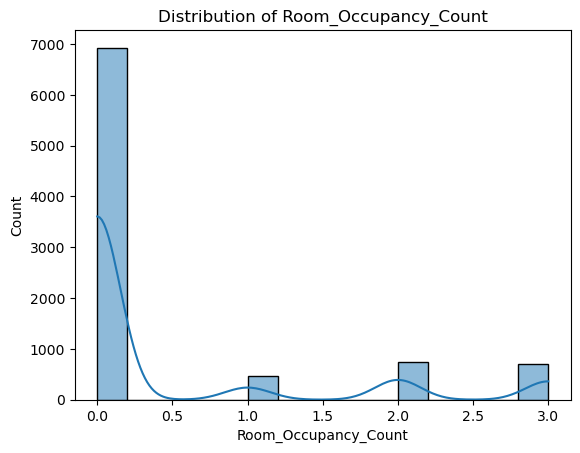

In [40]:
# histogram
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_features:
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

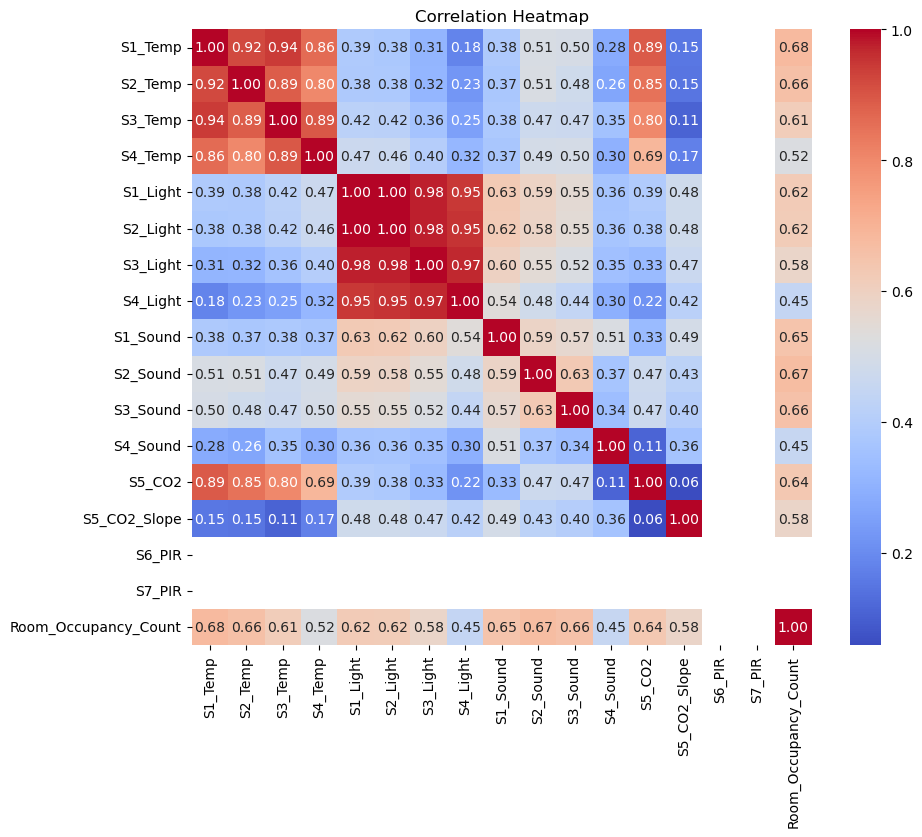

In [41]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

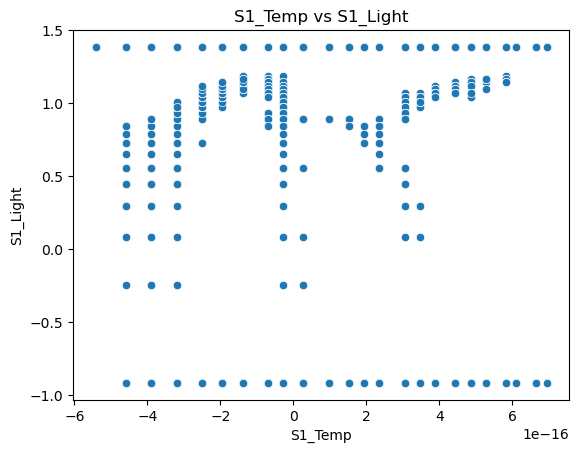

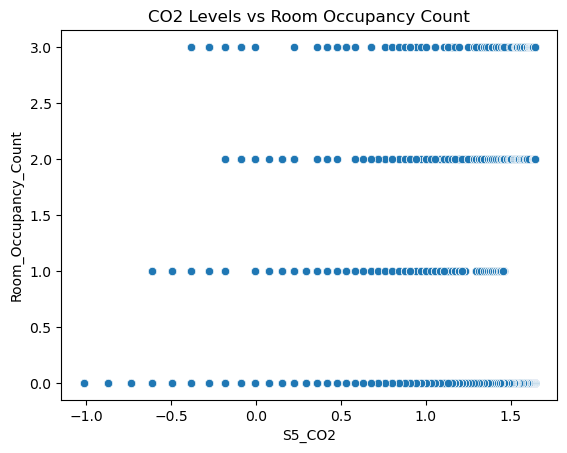

In [42]:
#Scatter Plots Between Sensors: Scatter plots can reveal relationships between sensor pairs.

# Temperature vs. Light
sns.scatterplot(x=df['S1_Temp'], y=df['S1_Light'])
plt.title('S1_Temp vs S1_Light')
plt.xlabel('S1_Temp')
plt.ylabel('S1_Light')
plt.show()

# CO2 Levels and Occupancy
sns.scatterplot(x=df['S5_CO2'], y=df['Room_Occupancy_Count'])
plt.title('CO2 Levels vs Room Occupancy Count')
plt.xlabel('S5_CO2')
plt.ylabel('Room_Occupancy_Count')
plt.show()

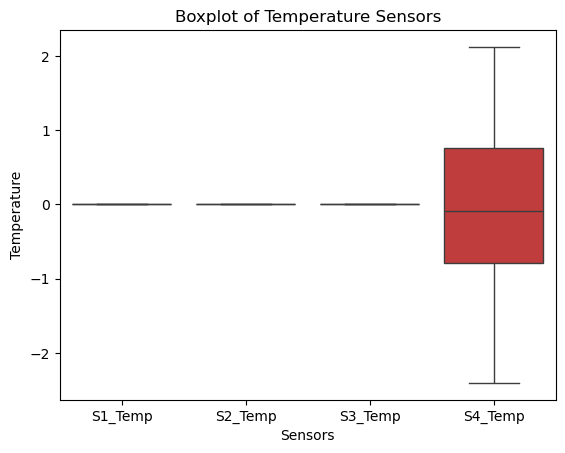

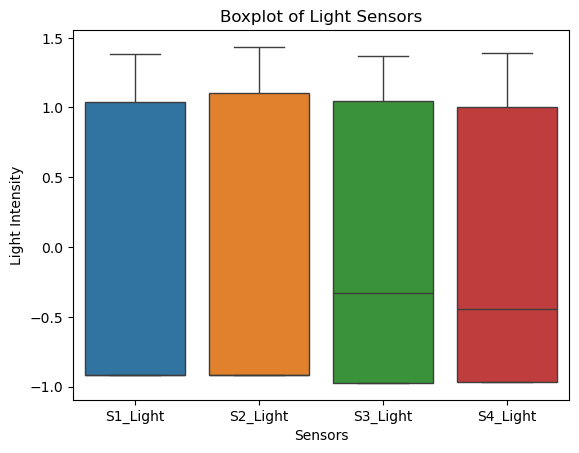

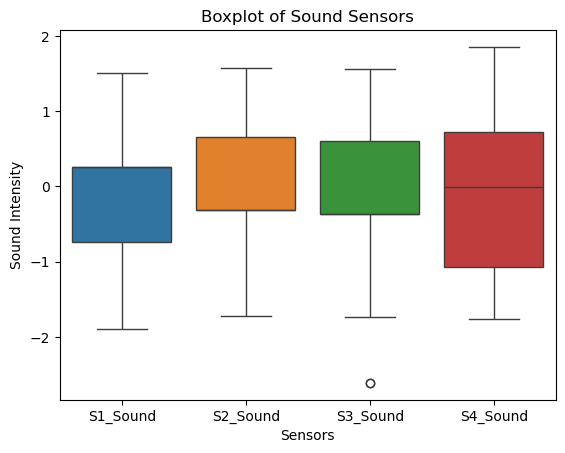

In [43]:
#Boxplots for Each Sensor Type: Analyze the spread and identify outliers for each type of sensor.

#Temperature Sensors
temp_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
sns.boxplot(data=df[temp_columns])
plt.title('Boxplot of Temperature Sensors')
plt.xlabel('Sensors')
plt.ylabel('Temperature')
plt.show()

#b. Light Sensors
light_columns = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']
sns.boxplot(data=df[light_columns])
plt.title('Boxplot of Light Sensors')
plt.xlabel('Sensors')
plt.ylabel('Light Intensity')
plt.show()

#c. Sound Sensors
sound_columns = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']
sns.boxplot(data=df[sound_columns])
plt.title('Boxplot of Sound Sensors')
plt.xlabel('Sensors')
plt.ylabel('Sound Intensity')
plt.show()

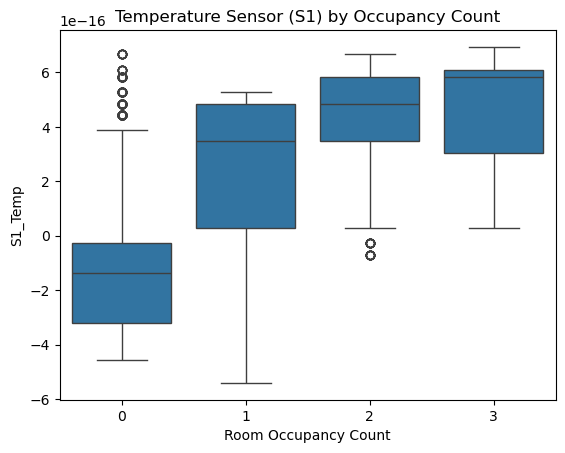

In [179]:
#Occupancy Analysis
# Boxplots for Sensors by Occupancy
sns.boxplot(x='Room_Occupancy_Count', y='S1_Temp', data=df)
plt.title('Temperature Sensor (S1) by Occupancy Count')
plt.xlabel('Room Occupancy Count')
plt.ylabel('S1_Temp')
plt.show()


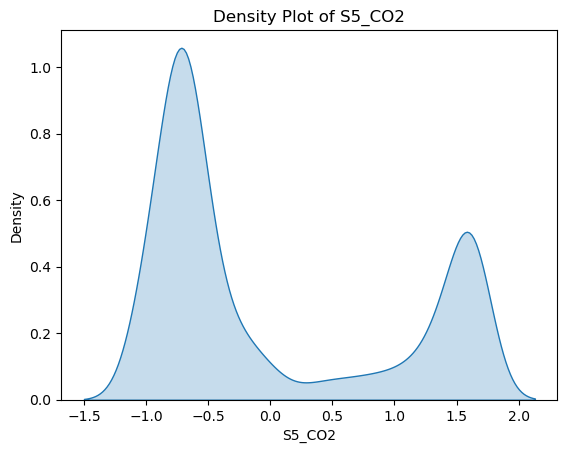

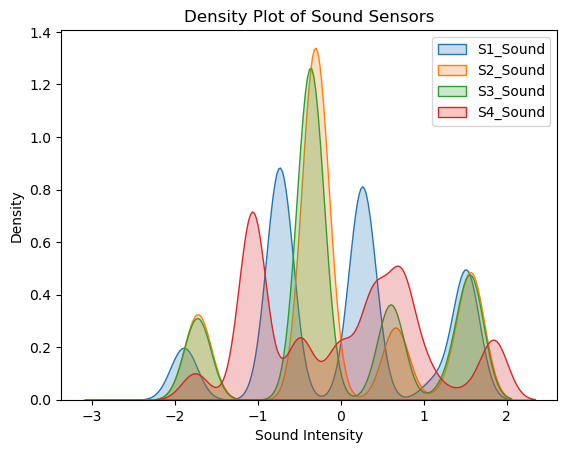

In [45]:
#Density Plots for Specific Sensors
#CO2 Levels

sns.kdeplot(df['S5_CO2'], fill=True)
plt.title('Density Plot of S5_CO2')
plt.xlabel('S5_CO2')
plt.ylabel('Density')
plt.show()
# Sound Sensors

for col in sound_columns:
    sns.kdeplot(df[col], fill=True, label=col)

plt.title('Density Plot of Sound Sensors')
plt.xlabel('Sound Intensity')
plt.ylabel('Density')
plt.legend()
plt.show()

## Feature Selection

In [47]:
# Separating features and target variable
X = df1.drop(columns='Room_Occupancy_Count', axis=1)  # Assuming 'Room_Occupancy_Count' is the target
y = df1['Room_Occupancy_Count']

In [48]:
# Feature selection
sk = SelectKBest(score_func=f_classif,k=10)
x_kbest = sk.fit_transform(X,y)

In [49]:
select_ind = sk.get_support(indices=True)

In [50]:
selected_features = X.columns[select_ind]
selected_features

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S1_Sound', 'S2_Sound', 'S3_Sound', 'S5_CO2'],
      dtype='object')

In [51]:
# Convert X_k_best to a DataFrame for scaling
x_kbest_df = pd.DataFrame(x_kbest, columns=selected_features)

## Feature Scaling

In [53]:
# Scaling 
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_kbest)
x_scaled

array([[-1.72764399, -2.09822914, -1.3057563 , ...,  1.56955889,
        -0.36872436, -0.00296447],
       [-1.72764399, -2.09822914, -1.3057563 , ..., -0.3094313 ,
        -0.36872436, -0.00296447],
       [-1.46095406, -2.09822914, -1.47810737, ...,  1.56955889,
         1.29209066, -0.00296447],
       ...,
       [-1.01647086, -1.14125754, -0.93951027, ..., -0.3094313 ,
        -0.36872436, -1.01257853],
       [-1.01647086, -1.14125754, -0.93951027, ...,  1.56955889,
         1.56000086, -1.01257853],
       [-1.01647086, -1.14125754, -0.93951027, ..., -0.3094313 ,
        -0.36872436, -1.01257853]])

## Split Data into Training and Testing Sets

In [55]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

In [56]:
# Display the shapes to verify
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (7062, 10)
Testing Features Shape: (1766, 10)
Training Target Shape: (7062,)
Testing Target Shape: (1766,)


### Model Building

In [58]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
}

### Model Evaluation

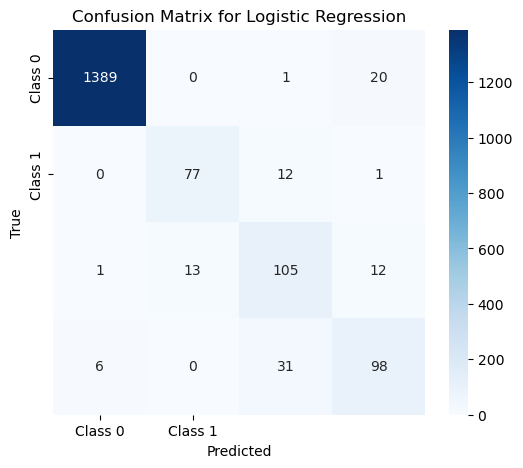

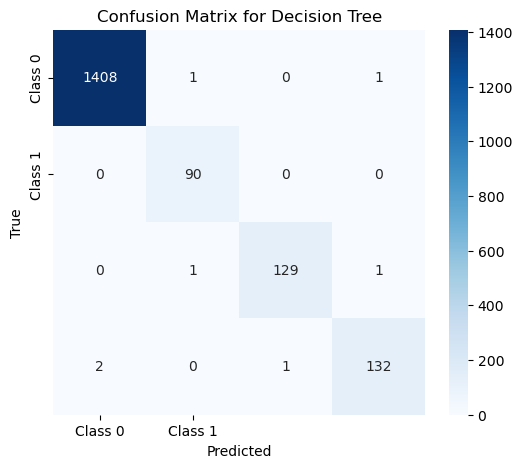

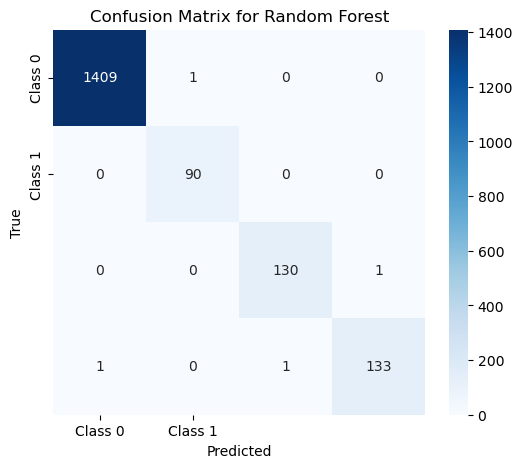

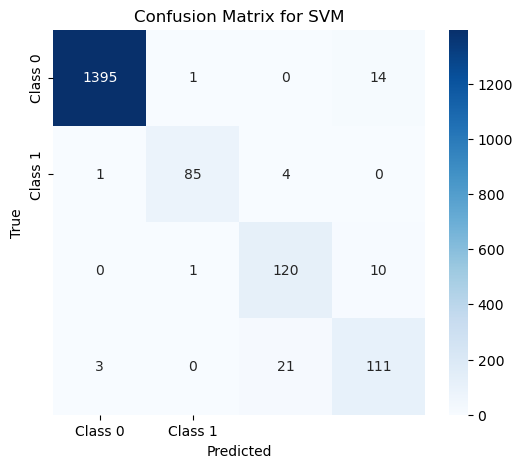

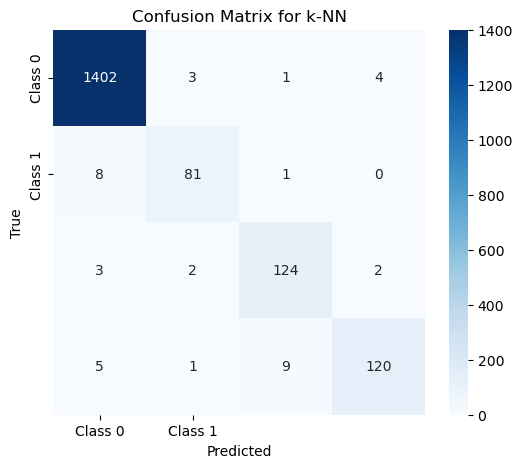


Logistic Regression:
Accuracy: 0.9451
Confusion Matrix:
[[1389    0    1   20]
 [   0   77   12    1]
 [   1   13  105   12]
 [   6    0   31   98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1410
           1       0.86      0.86      0.86        90
           2       0.70      0.80      0.75       131
           3       0.75      0.73      0.74       135

    accuracy                           0.95      1766
   macro avg       0.83      0.84      0.83      1766
weighted avg       0.95      0.95      0.95      1766


Decision Tree:
Accuracy: 0.9960
Confusion Matrix:
[[1408    1    0    1]
 [   0   90    0    0]
 [   0    1  129    1]
 [   2    0    1  132]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1410
           1       0.98      1.00      0.99        90
           2       0.99      0.98      0.99       131
        

In [60]:
results = {}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    
     # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Printing results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [61]:
# Print results
print("Model Performance:")
for model, metrics in results.items():
    accuracy = metrics.get('Accuracy', 0)  # Use .get() to avoid potential KeyError
    print(f"{model}: Accuracy = {accuracy:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.9451
Decision Tree: Accuracy = 0.9960
Random Forest: Accuracy = 0.9977
SVM: Accuracy = 0.9689
k-NN: Accuracy = 0.9779


### Best Model

In [63]:
# Find best model
best_model_name, best_model_metrics = max(results.items(), key=lambda x: x[1].get('Accuracy', 0))
best_model_accuracy = best_model_metrics.get('Accuracy', 0)

# Print best model
print(f"\nThe best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


The best model is Random Forest with an accuracy of 0.9977


## Hyperparameter Tuning

In [156]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best Accuracy: 0.996601268271754


## Pipeline

In [159]:
# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', best_rf)             # Best Random Forest model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=400,
                                        random_state=42))])

## Save the Model

In [161]:
# Save the model
joblib.dump(pipeline, 'random_forest_pipeline.joblib')
print("Model saved as random_forest_pipeline.joblib")


Model saved as random_forest_pipeline.joblib


## Prediction on Unseen Data

In [71]:
#Load the Pipeline
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')

In [145]:
#Load theunseen data
df_unseen = pd.read_csv('Occupancy_unseenn.csv')
df_unseen.head()

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2,y_actual
0,24.94,24.75,24.56,121,34,53,0.08,0.19,0.06,390,1
1,24.94,24.75,24.56,121,33,53,0.93,0.05,0.06,390,1
2,25.00,24.75,24.50,121,34,53,0.43,0.11,0.08,390,1
3,25.00,24.75,24.56,121,34,53,0.41,0.10,0.10,390,1
4,25.00,24.75,24.56,121,34,54,0.18,0.06,0.06,390,1


In [147]:
#Splitting X and Y
X_unseen = df_unseen.drop('y_actual', axis=1)  # Drop the target column
y_actual = df_unseen['y_actual']  # The true target labe

In [149]:
#Predicting with Unseen Data
y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [163]:
 # assign a column unseen pred
df_unseen['unseen_pred']=y_unseen_pred

 #save as csv file
df_unseen.to_csv('unseenpred_occupancy.csv',index=False) 

 #read file
predicted_unseen=pd.read_csv('unseenpred_occupancy.csv')

predicted_unseen.head()

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2,y_actual,unseen_pred
0,24.94,24.75,24.56,121,34,53,0.08,0.19,0.06,390,1,3
1,24.94,24.75,24.56,121,33,53,0.93,0.05,0.06,390,1,3
2,25.00,24.75,24.50,121,34,53,0.43,0.11,0.08,390,1,3
3,25.00,24.75,24.56,121,34,53,0.41,0.10,0.10,390,1,3
4,25.00,24.75,24.56,121,34,54,0.18,0.06,0.06,390,1,3


In [153]:
#Evaluation with unseen data

print("Accuracy on Unseen Data:", accuracy_score(y_actual, y_unseen_pred))
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_unseen_pred))
print("Classification Report:\n", classification_report(y_actual, y_unseen_pred))

Accuracy on Unseen Data: 0.6584065554348899
Confusion Matrix:
 [[5976    0    1 2251]
 [   0    0    0  459]
 [   0    0    0  748]
 [   1    0    0  693]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84      8228
           1       0.00      0.00      0.00       459
           2       0.00      0.00      0.00       748
           3       0.17      1.00      0.29       694

    accuracy                           0.66     10129
   macro avg       0.29      0.43      0.28     10129
weighted avg       0.82      0.66      0.70     10129



## Interpretation of Results (Conclusion):

The Random Forest model performed exceptionally well, achieving a high accuracy of 99.77%. This indicates its effectiveness in predicting room occupancy based on sensor data. However, some limitations of the dataset include:

* **Class Imbalance:** Certain occupancy classes might be underrepresented, potentially affecting the model's generalization.

* **Environmental Dependency:** The dataset's reliance on specific environmental conditions may limit its applicability to other settings with differing sensor arrangements or conditions.

## Future Work:

This model has the potential to be applied in various domains, including:

* **Smart Building Systems:** Optimizing energy consumption by dynamically controlling lighting, heating, and cooling based on room occupancy.
* **Security Monitoring:** Detecting unauthorized access or monitoring building usage.
* **Space Management:** Enhancing efficiency in co-working spaces, conference rooms, or classrooms by monitoring and predicting usage patterns.

These applications can contribute to energy savings, improved security, and better resource allocation.